In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import glob
import os
import cv2
from sklearn.svm import SVC
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1='drive/MyDrive/STATS402_Project/label_csv'

In [ ]:
train = pd.read_json('train.jsonl', lines=True)
train['label'].unique()

array([0, 1])

In [ ]:
test_seen =  pd.read_json('test_seen.jsonl', lines=True)
test_unseen = pd.read_json('test_unseen.jsonl', lines=True)
dev_unseen = pd.read_json('dev_unseen.jsonl', lines=True)
dev_seen = pd.read_json('dev_seen.jsonl', lines=True)


In [ ]:
data = pd.concat([train,test_seen,test_unseen,dev_seen,dev_unseen])

In [ ]:
data

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
535,83675,img/83675.png,0,i'm gonna be like phelps one day
536,37198,img/37198.png,0,when you're so relaxed you can feel yourself g...
537,48670,img/48670.png,0,look at this sandwich maker club i found on wi...
538,9863,img/09863.png,0,diverse group of women


In [ ]:
data1 = data.drop_duplicates(subset=['img'])
data1

,id,img,label,text
0,42953,img/42953.png,0,its their character not their color that matters
1,23058,img/23058.png,0,don't be afraid to love again everyone is not ...
2,13894,img/13894.png,0,putting bows on your pet
3,37408,img/37408.png,0,i love everything and everybody! except for sq...
4,82403,img/82403.png,0,"everybody loves chocolate chip cookies, even h..."
...,...,...,...,...
135,82054,img/82054.png,0,puzzle level expert
136,13749,img/13749.png,0,it's amazing how animal bodies and the human b...
137,85067,img/85067.png,0,rare image of a worker picking cotton
138,20541,img/20541.png,0,caught me cat and monkey today! this


In [ ]:
import os
import shutil

data_0 = data1[data1['label'] == 0]
data_1 = data1[data1['label'] == 1]

#moving files from 'img' to 'all_img/img0'
for index, row in data_0.iterrows():
    img_filename = row['img'].split('/')[-1]
    path = 'drive/MyDrive/img/' + img_filename

    if os.path.exists(path):
        target_dir = 'drive/MyDrive/all_img/img0/'
        os.makedirs(target_dir, exist_ok=True)

        target = target_dir + str(row['id']) + '.png'

        try:
            shutil.move(path, target)
            if not os.path.exists(path) and os.path.exists(target):
                print(f"Successfully moved {path} to {target}")
            else:
                print(f"Failed to move {path}")
        except Exception as e:
            print(f"Error moving file {path}: {e}")
    else:
        print(f"File not found: {path}")

#files from 'img' to 'all_img/img1'
for index, row in data_1.iterrows():
    img_filename = row['img'].split('/')[-1]
    path = 'drive/MyDrive/img/' + img_filename


    if os.path.exists(path):

        target_dir = 'drive/MyDrive/all_img/img1/'
        os.makedirs(target_dir, exist_ok=True)
        target = target_dir + str(row['id']) + '.png'

        try:
            shutil.move(path, target)
            if not os.path.exists(path) and os.path.exists(target):
                print(f"Successfully moved {path} to {target}")
            else:
                print(f"Failed to move {path}")
        except Exception as e:
            print(f"Error moving file {path}: {e}")
    else:
        print(f"File not found: {path}")


Streaming output truncated to the last 5000 lines.
File not found: drive/MyDrive/img/65908.png
File not found: drive/MyDrive/img/51237.png
File not found: drive/MyDrive/img/30286.png
File not found: drive/MyDrive/img/95814.png
File not found: drive/MyDrive/img/52716.png
File not found: drive/MyDrive/img/65940.png
File not found: drive/MyDrive/img/39175.png
File not found: drive/MyDrive/img/68903.png
File not found: drive/MyDrive/img/26319.png
File not found: drive/MyDrive/img/24653.png
File not found: drive/MyDrive/img/13248.png
File not found: drive/MyDrive/img/17054.png
File not found: drive/MyDrive/img/52960.png
File not found: drive/MyDrive/img/90127.png
File not found: drive/MyDrive/img/03871.png
File not found: drive/MyDrive/img/84907.png
File not found: drive/MyDrive/img/09376.png
File not found: drive/MyDrive/img/92408.png
File not found: drive/MyDrive/img/41325.png
File not found: drive/MyDrive/img/52318.png
File not found: drive/MyDrive/img/35902.png
File not found: drive/MyD

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/lib/python3.10/genericpath.py", line 19, in exists
    os.stat(path)
FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/img/10973.png'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-a93693a39536>", line 13, in <cell line: 8>
    if os.path.exists(path):
  File "/usr/lib/python3.10/genericpath.py", line 19, in exists
    os.stat(path)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'



TypeError: object of type 'NoneType' has no len()

In [ ]:
from torchvision import transforms as T
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder

In [ ]:
dataset_path = '/content/drive/MyDrive/all_img'

#normalization and transformations
normalize = T.Normalize(mean=[0.4, 0.4, 0.4], std=[0.2, 0.2, 0.2])
transform = T.Compose([
    T.RandomResizedCrop(224),
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    normalize,
])
dataset = ImageFolder(dataset_path, transform=transform)


In [ ]:
print(dataset.classes)

['img0', 'img1']


In [ ]:
print(dataset.class_to_idx)

{'img0': 0, 'img1': 1}


In [ ]:
print(dataset.imgs)

[('/content/drive/MyDrive/all_img/img0/01765.png', 0), ('/content/drive/MyDrive/all_img/img0/01793.png', 0), ('/content/drive/MyDrive/all_img/img0/02653.png', 0), ('/content/drive/MyDrive/all_img/img0/02657.png', 0), ('/content/drive/MyDrive/all_img/img0/02674.png', 0), ('/content/drive/MyDrive/all_img/img0/06987.png', 0), ('/content/drive/MyDrive/all_img/img0/07125.png', 0), ('/content/drive/MyDrive/all_img/img0/07135.png', 0), ('/content/drive/MyDrive/all_img/img0/4769.png', 0), ('/content/drive/MyDrive/all_img/img0/4857.png', 0), ('/content/drive/MyDrive/all_img/img0/50261.png', 0), ('/content/drive/MyDrive/all_img/img0/50278.png', 0), ('/content/drive/MyDrive/all_img/img0/50286.png', 0), ('/content/drive/MyDrive/all_img/img0/50293.png', 0), ('/content/drive/MyDrive/all_img/img0/5938.png', 0), ('/content/drive/MyDrive/all_img/img0/6273.png', 0), ('/content/drive/MyDrive/all_img/img0/9285.png', 0), ('/content/drive/MyDrive/all_img/img0/9352.png', 0), ('/content/drive/MyDrive/all_img/

In [ ]:
images = []
labels = []
for i in range(len(dataset)):
  print(i)
  image = dataset[i][0].detach().numpy()
  image2 = image.reshape(image.shape[1],image.shape[2],image.shape[0])
  print(image2.shape)
  images.append(image2)
  labels.append(dataset[i][1])

Streaming output truncated to the last 5000 lines.
1304
(224, 224, 3)
1305
(224, 224, 3)
1306
(224, 224, 3)
1307
(224, 224, 3)
1308
(224, 224, 3)
1309
(224, 224, 3)
1310
(224, 224, 3)
1311
(224, 224, 3)
1312
(224, 224, 3)
1313
(224, 224, 3)
1314
(224, 224, 3)
1315
(224, 224, 3)
1316
(224, 224, 3)
1317
(224, 224, 3)
1318
(224, 224, 3)
1319
(224, 224, 3)
1320
(224, 224, 3)
1321
(224, 224, 3)
1322
(224, 224, 3)
1323
(224, 224, 3)
1324
(224, 224, 3)
1325
(224, 224, 3)
1326
(224, 224, 3)
1327
(224, 224, 3)
1328
(224, 224, 3)
1329
(224, 224, 3)
1330
(224, 224, 3)
1331
(224, 224, 3)
1332
(224, 224, 3)
1333
(224, 224, 3)
1334
(224, 224, 3)
1335
(224, 224, 3)
1336
(224, 224, 3)
1337
(224, 224, 3)
1338
(224, 224, 3)
1339
(224, 224, 3)
1340
(224, 224, 3)
1341
(224, 224, 3)
1342
(224, 224, 3)
1343
(224, 224, 3)
1344
(224, 224, 3)
1345
(224, 224, 3)
1346
(224, 224, 3)
1347
(224, 224, 3)
1348
(224, 224, 3)
1349
(224, 224, 3)
1350
(224, 224, 3)
1351
(224, 224, 3)
1352
(224, 224, 3)
1353
(224, 224, 3)

In [ ]:
images = np.array(images)

In [ ]:
images.shape

(3804, 224, 224, 3)

In [ ]:
ylabel =np.array(labels)
train_label = ylabel.reshape(len(ylabel),1)
train_label

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
#count the distinct variables
(unique, counts) = np.unique(train_label, return_counts=True)

frequencies = np.asarray((unique, counts)).T

print (frequencies)
print (len(unique))

[[   0   82]
 [   1 3722]]
2


In [ ]:
class_types=['not hate','hate']

In [ ]:
train_lab_categorical = tf.keras.utils.to_categorical(
    ylabel, num_classes=2)
print(train_lab_categorical)

train_lab_categorical = train_lab_categorical.astype('uint8')

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
from sklearn.model_selection import train_test_split
train_im, test_im, train_lab, test_lab = train_test_split(images, train_label, test_size=0.20,
                                                            random_state=40, shuffle = True)
print(train_im.shape)

(3043, 224, 224, 3)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from keras import regularizers

In [ ]:
#Data Augmentation
batch_size = 64

train_DataGen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2,
                                                                width_shift_range=0.1,
                                                                height_shift_range = 0.1,
                                                                horizontal_flip=True)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

train_set_conv = train_DataGen.flow(train_im, train_lab, batch_size=batch_size)
valid_set_conv = valid_datagen.flow(test_im, test_lab, batch_size=batch_size)

In [ ]:
#define identity unit for the network
def res_identity(x, filters):

  x_skip = x
  f1, f2 = filters

  x = Conv2D(f1, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)


  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)

  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x

In [ ]:
def res_conv(x, s, filters):

  x_skip = x
  f1, f2 = filters

  # first block
  x = Conv2D(f1, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  # second block
  x = Conv2D(f1, kernel_size=(3, 3), strides=(1, 1), padding='same', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)

  #third block
  x = Conv2D(f2, kernel_size=(1, 1), strides=(1, 1), padding='valid', kernel_regularizer=l2(0.001))(x)
  x = BatchNormalization()(x)

  # shortcut
  x_skip = Conv2D(f2, kernel_size=(1, 1), strides=(s, s), padding='valid', kernel_regularizer=l2(0.001))(x_skip)
  x_skip = BatchNormalization()(x_skip)

  # add
  x = Add()([x, x_skip])
  x = Activation(activations.relu)(x)

  return x

In [ ]:
#50 layers resnet.
def resnet50():

  input_im = Input(shape=(train_im.shape[1], train_im.shape[2], train_im.shape[3]))
  x = ZeroPadding2D(padding=(3, 3))(input_im)

  # perform maxpooling

  x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2))(x)
  x = BatchNormalization()(x)
  x = Activation(activations.relu)(x)
  x = MaxPooling2D((3, 3), strides=(2, 2))(x)


  x = res_conv(x, s=1, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))
  x = res_identity(x, filters=(64, 256))

  # 3rd stage

  x = res_conv(x, s=2, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))
  x = res_identity(x, filters=(128, 512))

  # 4th stage

  x = res_conv(x, s=2, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))
  x = res_identity(x, filters=(256, 1024))

  # 5th stage

  x = res_conv(x, s=2, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))
  x = res_identity(x, filters=(512, 2048))


  x = AveragePooling2D((2, 2), padding='same')(x)

  x = Flatten()(x)

  x = Dense(len(class_types),activation='softmax',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01))(x)

  model = Model(inputs=input_im, outputs=x, name='Resnet50')

  return model

In [ ]:
#Define some Callbacks
def lrdecay(epoch):
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    return lr

lrdecay = tf.keras.callbacks.LearningRateScheduler(lrdecay)


def earlystop(mode):
  if mode=='acc':
    estop = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=15, mode='max')
  elif mode=='loss':
    estop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, mode='min')
  return estop

In [ ]:
resnet50_model = resnet50()

In [ ]:
resnet50_model.summary()

Model: "Resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['zero_padding2d[0][0]']      
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d[0][0]']       

In [ ]:
resnet50_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=1e-4),
                       metrics=['acc'])

In [ ]:
import tensorflow as tf
num_classes = 2

# One-hot encode the labels
train_labels_encoded = tf.keras.utils.to_categorical(train_set_conv.y, num_classes=num_classes)
valid_labels_encoded = tf.keras.utils.to_categorical(valid_set_conv.y, num_classes=num_classes)


In [ ]:
#Run the model
batch_size = batch_size

resnet_train = resnet50_model.fit(
    train_set_conv.x,
    train_labels_encoded,
    epochs=20,
    steps_per_epoch=int(train_im.shape[0] / batch_size),
    validation_steps=int(test_im.shape[0] / batch_size),
    validation_data=(valid_set_conv.x, valid_labels_encoded)
    callbacks=[lrdecay]
)

Epoch 1/20
47/47 [==============================] - 209s 4s/step - loss: 19.4847 - acc: 0.9570 - val_loss: 744.0770 - val_acc: 0.9790 - lr: 0.0010
Epoch 2/20
47/47 [==============================] - 188s 4s/step - loss: 16.4102 - acc: 0.9770 - val_loss: 15.2619 - val_acc: 0.9790 - lr: 0.0010
Epoch 3/20
47/47 [==============================] - 187s 4s/step - loss: 14.2924 - acc: 0.9777 - val_loss: 58.8811 - val_acc: 0.9777 - lr: 0.0010
Epoch 4/20
47/47 [==============================] - 189s 4s/step - loss: 12.1067 - acc: 0.9777 - val_loss: 11.6653 - val_acc: 0.9777 - lr: 0.0010
Epoch 5/20
47/47 [==============================] - 186s 4s/step - loss: 10.7975 - acc: 0.9770 - val_loss: 9.7854 - val_acc: 0.9790 - lr: 0.0010
Epoch 6/20
47/47 [==============================] - 189s 4s/step - loss: 9.2574 - acc: 0.9754 - val_loss: 8.6678 - val_acc: 0.9790 - lr: 0.0010
Epoch 7/20
47/47 [==============================] - 188s 4s/step - loss: 8.3618 - acc: 0.9773 - val_loss: 7.6383 - val_acc: 0.

In [ ]:
representation_model = Model(inputs=resnet50_model.inputs, outputs=resnet50_model.get_layer('flatten').output)

In [ ]:
representation_model_output = representation_model.predict(train_im)

96/96 [==============================] - 46s 465ms/step


In [ ]:
representation_model_output.shape

(3043, 32768)

In [ ]:
representation_model_output_test = representation_model.predict(test_im)

24/24 [==============================] - 11s 456ms/step


In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',C=0.1)

In [ ]:
from sklearn.metrics import accuracy_score
svm.fit(representation_model_output,train_lab)
predicts=svm.predict(representation_model_output_test)
accuracy_score(test_lab,predicts)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9789750328515112

In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_lab, predicts)
matrix

array([[  0,  16],
       [  0, 745]])

In [ ]:
def plot_confusion_matrix(cm, labels_name, title):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    num_local = np.array(range(len(labels_name)))
    plt.xticks(num_local, labels_name, rotation=90)
    plt.yticks(num_local, labels_name)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

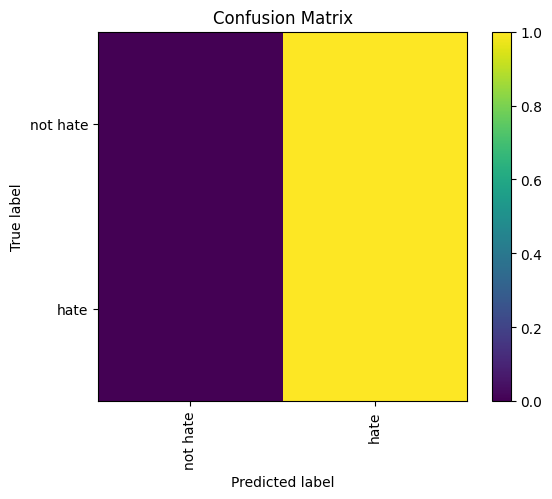

In [ ]:
plot_confusion_matrix(matrix, class_types, "Confusion Matrix")
plt.show()